<a href="https://colab.research.google.com/github/Mahdi-Miri/SpamText/blob/main/SpamMessage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/Mahdi-Miri/SpamText.git

Cloning into 'SpamText'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 207.40 KiB | 3.77 MiB/s, done.


In [40]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [41]:
df = pd.read_csv("/content/SpamText/SPAM text message 20170820 - Data.csv")

In [42]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df.shape

(5572, 2)

In [44]:
df["Category"].replace({"ham" : 0 , "spam": 1}, inplace=True)

<ipython-input-44-b95ba901794a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace({"ham" : 0 , "spam": 1}, inplace=True)
<ipython-input-44-b95ba901794a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"].replace({"ham" : 0 , "spam": 1}, inplace=True)


In [45]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
data = {"category" : ["spam" , "ham"],
        "number" : [len(df.loc[df.Category ==1]),len(df.loc[df.Category == 0])]}
df_count = pd.DataFrame(data,columns=["category","number"])

In [47]:
df_count

,category,number
0,spam,747
1,ham,4825


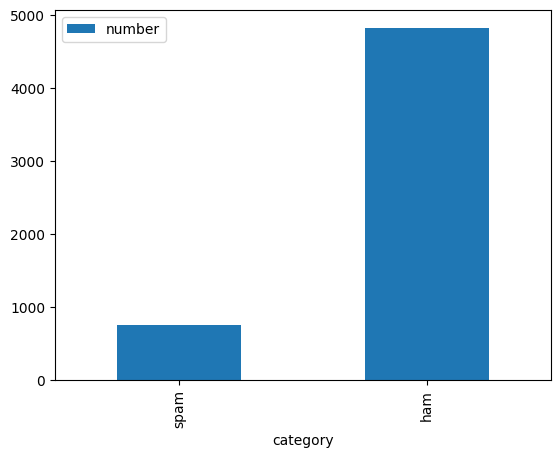

In [48]:
df_count.plot.bar(x = "category" , y = "number")
plt.show()

In [49]:
stemmer  = PorterStemmer()

In [50]:
corpus = []

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
for w in range (len(df["Message"])):
  msg = df["Message"][w]
  msg = re.sub("[^a-zA-Z]"," ",msg)
  msg = msg.lower()
  msg = msg.split()
  msg = [stemmer.stem(word) for word in msg if not word in set(stopwords.words("english"))]
  msg = " ".join(msg)
  corpus.append(msg)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tf = TfidfVectorizer()

In [57]:
tf.fit(corpus)

TfidfVectorizer()

In [58]:
tf.vocabulary_

{'go': 2171,
 'jurong': 2827,
 'point': 4091,
 'crazi': 1169,
 'avail': 379,
 'bugi': 738,
 'great': 2245,
 'world': 6135,
 'la': 2932,
 'buffet': 736,
 'cine': 964,
 'got': 2208,
 'amor': 190,
 'wat': 5957,
 'ok': 3760,
 'lar': 2960,
 'joke': 2794,
 'wif': 6056,
 'oni': 3785,
 'free': 2007,
 'entri': 1673,
 'wkli': 6101,
 'comp': 1058,
 'win': 6067,
 'fa': 1791,
 'cup': 1220,
 'final': 1890,
 'tkt': 5536,
 'st': 5103,
 'may': 3276,
 'text': 5420,
 'receiv': 4402,
 'question': 4319,
 'std': 5131,
 'txt': 5695,
 'rate': 4364,
 'appli': 262,
 'dun': 1551,
 'say': 4651,
 'earli': 1568,
 'hor': 2477,
 'alreadi': 163,
 'nah': 3532,
 'think': 5468,
 'goe': 2175,
 'usf': 5811,
 'live': 3070,
 'around': 302,
 'though': 5485,
 'freemsg': 2013,
 'hey': 2408,
 'darl': 1267,
 'week': 5992,
 'word': 6129,
 'back': 414,
 'like': 3042,
 'fun': 2059,
 'still': 5152,
 'tb': 5367,
 'xxx': 6202,
 'chg': 922,
 'send': 4721,
 'rcv': 4375,
 'even': 1722,
 'brother': 710,
 'speak': 5037,
 'treat': 5638,
 'ai